In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from library.sb_utils import save_file

In [2]:
#load in the raw data into dataframes

data_raw = pd.read_csv('data/fraud_challenge_150k.csv', parse_dates=True)

In [3]:
pd.set_option('display.max_columns', None)

data_raw.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,California,40771.0,cad,D,F,U,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,Florida,24480.0,cad,X,X,H,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,Utah,37778.0,cad,X,Q,X,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,Virginia,55790.0,usd,G,G,C,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,South Carolina,37370.0,cad,X,F,F,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


In [4]:
data_raw.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,149892.000000,149870.000000,149886.000000,149885.000000,149876.000000,149872.000000,149864.000000,149872.000000
mean,4645.751995,2521.458944,54.202434,4702.200033,50190.088160,41837.521512,49.866392,7998.025275
std,1153.816155,604.524161,10.070401,1188.476704,28378.078852,10080.587192,29.204766,4047.071560
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25314.000000,35386.000000,24.000000,4487.000000
50%,4667.000000,2544.000000,55.000000,4730.000000,50117.000000,42086.000000,50.000000,8002.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74338.000000,47374.000000,75.000000,11494.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [6]:
#description of columns and how to resolve null values
#which columns can we remove?

#account_age_days: account age in days - if null, we assume = days since last logon, if both null then = 1
#transaction_amt: transaction amount - if null, maybe median *see if null rows are any different
#transaction_adj_amt: transaction adjusted amount - drop or fill nulls as median
#historic_velocity: drop or fill nulls as median
#ip_address: ip address - maybe transform into time-based "number of times this ip address has been used in the past" - if null, transformation = 0
#user_agent: browser information >> later: one hot encode only this column to build a model and determine which is most important
#    extract browser information into new columns - if null, create new category = "unknown"
#email_domain: email domain >> same as user_agent
#phone_number: phone number - area code? maybe drop
#billing_city: billing city - drop
#billing_postal: billing zip code - drop
#billing_state: billing state - drop
#card_bin: initial 4-6 numbers on credit card - maybe make numeric, otherwise drop
#currency: currency >> one hot encode, convert transaction_amt using currency
#cvv: drop
#signature_image: drop
#transaction_type: drop
#transaction_env: drop
#EVENT_TIMESTAMP: time of transaction - convert to date_time
#applicant_name: customer name - drop
#billing_address: billing street address - drop
#merchant_id: merchant id - drop
#locale: language and region preference id - split into lang and country, one hot encode
#tranaction_initiate: drop
#days_since_last_logon: days since last logon - null = median
#inital_amount: - null - median
#EVENT_LABEL: if transaction is legit or fraud - no null values *this is the target variable

In [7]:
#drop columns

data_raw = data_raw.drop(['user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_postal', 
                          'billing_state', 'card_bin', 'cvv', 'signature_image', 'transaction_type', 
                          'transaction_env', 'applicant_name', 'billing_address', 'merchant_id', 'tranaction_initiate',
                         ], axis=1)

/var/folders/1h/f10mrm6x3sg309bl17kg39r40000gp/T/ipykernel_26413/3734932161.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = data_raw.hist(ax = ax)


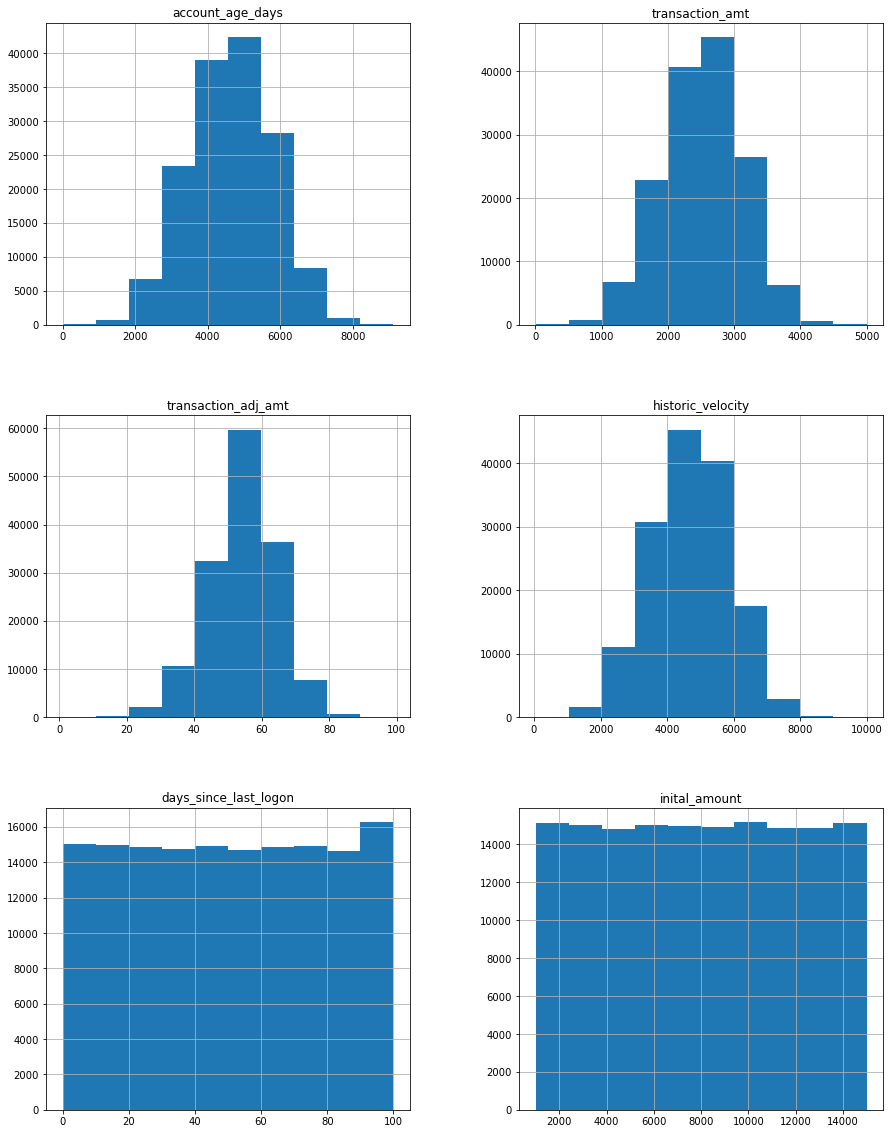

In [8]:
#initial histograms to look at distribution

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
_ = data_raw.hist(ax = ax)

In [9]:
#account_age_days

for i, row in data_raw.iterrows():
    if pd.isnull(row.account_age_days):
        if pd.isnull(row.days_since_last_logon):
            data_raw.loc[i, 'account_age_days'] = 1
        else:
            data_raw.loc[i, 'account_age_days'] = data_raw.loc[i, 'days_since_last_logon']

In [10]:
#transaction_amt, transaction_adj_amt, historic_velocity, days_since_last_logon,
#initial_amount => fillna to median value

data_raw.transaction_amt.fillna(data_raw.transaction_amt.median(), inplace=True)
data_raw.transaction_adj_amt.fillna(data_raw.transaction_adj_amt.median(), inplace=True)
data_raw.historic_velocity.fillna(data_raw.historic_velocity.median(), inplace=True)
data_raw.days_since_last_logon.fillna(data_raw.days_since_last_logon.median(), inplace=True)
data_raw.inital_amount.fillna(data_raw.inital_amount.median(), inplace=True)

In [11]:
#ip address - sort by timestamp and transform column into number of times ip address has shown up in the past

#convert EVENT_TIMESTAMP to datetime
data_raw.EVENT_TIMESTAMP = pd.to_datetime(data_raw.EVENT_TIMESTAMP)

#sort dataframe by timestamp
data_raw.sort_values('EVENT_TIMESTAMP', inplace=True, ignore_index=True)

#create column for ip_count to count each time an ip_address shows up
data_raw['ip_count'] = 1

#group data by ip_address and find cumulative sum of ip_count
data_raw['ip_counts'] = data_raw.groupby('ip_address')['ip_count'].cumsum()

#if a row doesn't have timestamp, change cumulative count to 1
#if a row doesn't have an ip address, change cumulative count to 0
for i, row in data_raw.iterrows():
    if pd.isnull(row.ip_address):
        data_raw.loc[i, 'ip_counts'] = 0
    elif pd.isnull(row.EVENT_TIMESTAMP):
        data_raw.loc[i, 'ip_counts'] = 1

data_raw.drop(['ip_address', 'ip_count'], axis=1, inplace=True)

In [12]:
#currency

currencies = pd.get_dummies(data_raw.currency, prefix='Currency')
data_raw = data_raw.join(currencies)
data_raw.drop(['currency', 'Currency_cad'], axis=1, inplace=True)

In [13]:
#locale - split into language and country

data_raw[['locale_lang', 'locale_country']] = data_raw.locale.str.split('_', expand=True)

In [14]:
data_raw.locale_lang.nunique()

182

In [15]:
data_raw.locale_country.nunique()

148

In [16]:
#the number of unique languages and countries is too high to use dummy variables - drop these for now

data_raw.drop(['locale', 'locale_lang', 'locale_country'], axis=1, inplace=True)

In [17]:
data_raw.drop(['EVENT_TIMESTAMP'], axis=1, inplace=True)

In [18]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       150000 non-null  float64
 1   transaction_amt        150000 non-null  float64
 2   transaction_adj_amt    150000 non-null  float64
 3   historic_velocity      150000 non-null  float64
 4   days_since_last_logon  150000 non-null  float64
 5   inital_amount          150000 non-null  float64
 6   EVENT_LABEL            150000 non-null  object 
 7   ip_counts              150000 non-null  int64  
 8   Currency_eur           150000 non-null  uint8  
 9   Currency_usd           150000 non-null  uint8  
dtypes: float64(6), int64(1), object(1), uint8(2)
memory usage: 9.4+ MB


In [19]:
#EDA

#histograms - understanding distributions

/var/folders/1h/f10mrm6x3sg309bl17kg39r40000gp/T/ipykernel_26413/277529055.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = data_raw.hist(ax = ax)


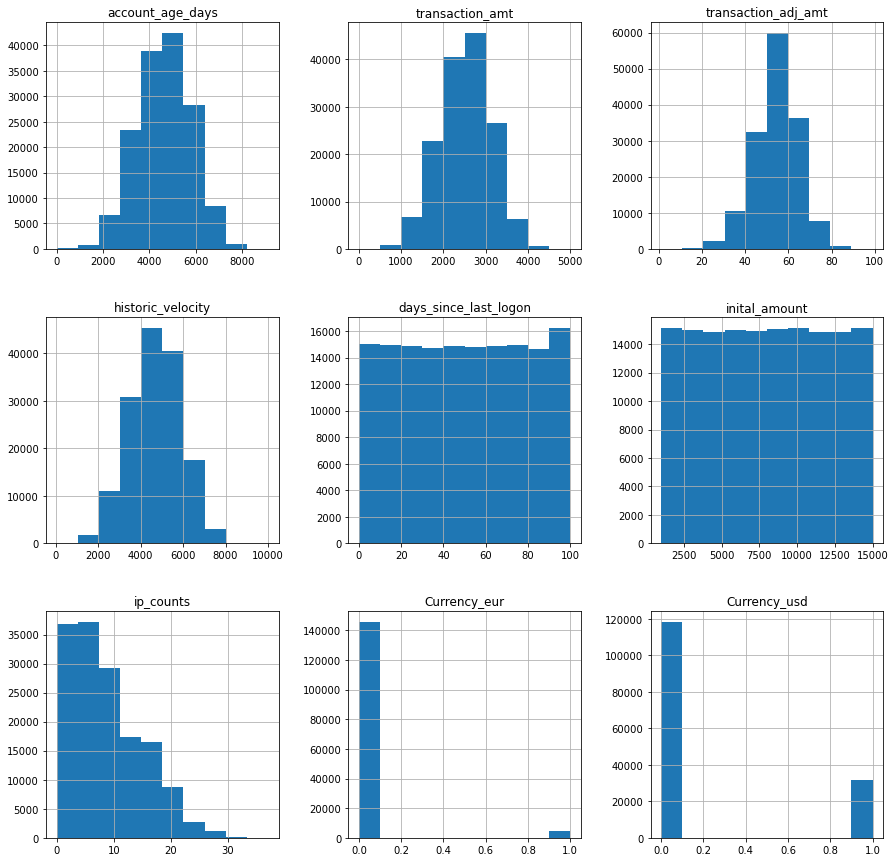

In [27]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
_ = data_raw.hist(ax = ax)

In [21]:
data_raw.corr()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,days_since_last_logon,inital_amount,ip_counts,Currency_eur,Currency_usd
account_age_days,1.000000,0.470524,0.206981,0.460157,0.002466,-0.000749,-0.032990,-0.211684,0.396100
transaction_amt,0.470524,1.000000,-0.031837,0.366089,0.000417,0.000561,0.009099,-0.105976,0.105578
transaction_adj_amt,0.206981,-0.031837,1.000000,0.066347,0.001974,0.002972,-0.070459,-0.029921,-0.099723
historic_velocity,0.460157,0.366089,0.066347,1.000000,0.000758,0.003465,-0.051312,-0.097826,0.229824
days_since_last_logon,0.002466,0.000417,0.001974,0.000758,1.000000,0.000086,-0.005855,0.001372,0.002196
inital_amount,-0.000749,0.000561,0.002972,0.003465,0.000086,1.000000,0.000127,-0.001178,-0.004045
ip_counts,-0.032990,0.009099,-0.070459,-0.051312,-0.005855,0.000127,1.000000,-0.029456,-0.043718
Currency_eur,-0.211684,-0.105976,-0.029921,-0.097826,0.001372,-0.001178,-0.029456,1.000000,-0.089825
Currency_usd,0.396100,0.105578,-0.099723,0.229824,0.002196,-0.004045,-0.043718,-0.089825,1.000000


<AxesSubplot:>

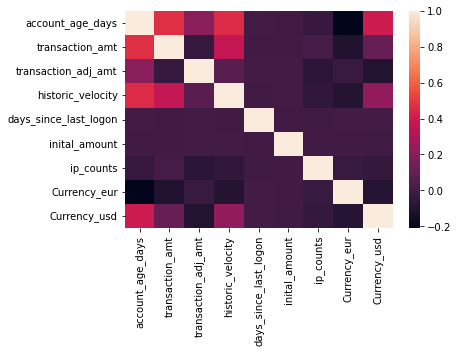

In [22]:
sns.heatmap(data_raw.corr())

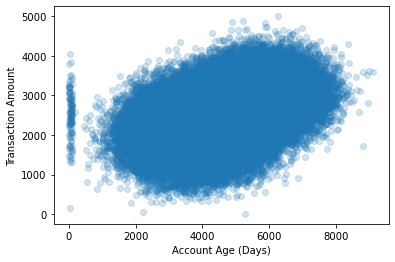

In [23]:
_ = plt.scatter(data_raw['account_age_days'], data_raw['transaction_amt'], alpha=0.2)
_ = plt.xlabel('Account Age (Days)')
_ = plt.ylabel('Transaction Amount')

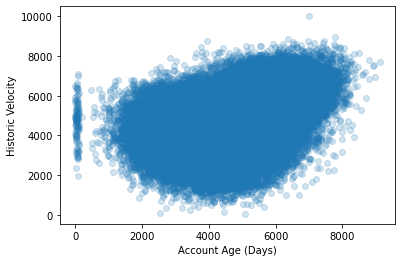

In [24]:
_ = plt.scatter(data_raw['account_age_days'], data_raw['historic_velocity'], alpha=0.2)
_ = plt.xlabel('Account Age (Days)')
_ = plt.ylabel('Historic Velocity')

In [25]:
#most features are not correlated with each other, which means that they are independent
#account age is somewhat correlated to transaction amount and historic velocity, which makes sense because the
#older the account, the more transactions are associated with it

In [26]:
from library.sb_utils import save_file

datapath = './data'
save_file(data_raw, 'data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "./data/data_cleaned.csv"
